### Rubén Barco Terrones

#### In this notebook we can see the differences between using Gini and Entropy in a DecisionTreeClassifier, as well as the different classifications in each node


Time:  0.0006197689717737376
Accuracy is  89.16666666666667


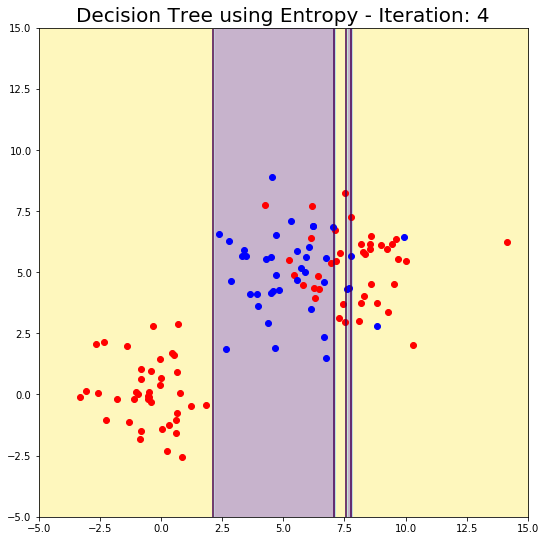

In [28]:
%reset -f
%matplotlib inline
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
MAXN=40
np.random.seed(2)
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

from sklearn import tree
from sklearn import metrics

delta = 0.05
xx = np.arange(-5.0, 15.0, delta)
yy = np.arange(-5.0, 15.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.c_[Xf[:,np.newaxis],Yf[:,np.newaxis]];
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=4)
import timeit

start = timeit.default_timer()

clf.fit(X,y.ravel())

stop = timeit.default_timer()

print('Time: ', stop - start) 

y_pred = clf.predict(X)

print ("Accuracy is ", accuracy_score(y.ravel(),y_pred)*100)

Z=clf.predict(data)
Z.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
plt.title("Decision Tree using Entropy - Iteration: 4", size = 20)
fig = plt.gcf()
fig.set_size_inches(9,9)

Time:  0.0008132000530167716
Accuracy is  90.0


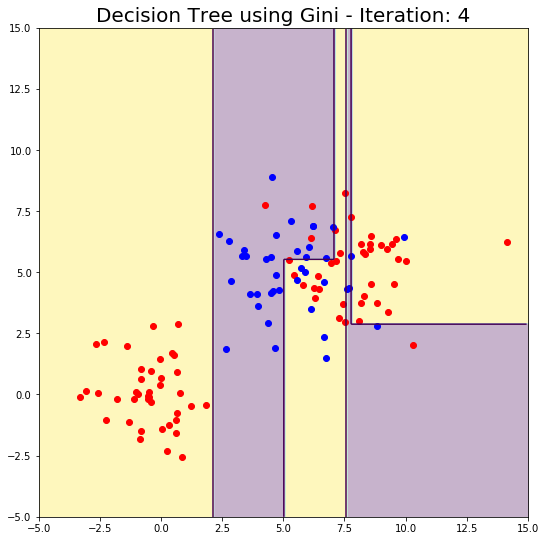

In [29]:
MAXN=40
np.random.seed(2)
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
idxplus = y==1
idxminus = y==-1
plt.scatter(X[idxplus.ravel(),0],X[idxplus.ravel(),1],color='r')
plt.scatter(X[idxminus.ravel(),0],X[idxminus.ravel(),1],color='b')

from sklearn import tree
from sklearn import metrics

delta = 0.05
xx = np.arange(-5.0, 15.0, delta)
yy = np.arange(-5.0, 15.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
data = np.c_[Xf[:,np.newaxis],Yf[:,np.newaxis]];
clf = tree.DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=4)
import timeit

start = timeit.default_timer()

clf.fit(X,y.ravel())

stop = timeit.default_timer()

print('Time: ', stop - start) 

y_pred = clf.predict(X)

print ("Accuracy is ", accuracy_score(y.ravel(),y_pred)*100)

Z=clf.predict(data)
Z.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
plt.contour(XX,YY,Z,[0])
plt.title("Decision Tree using Gini - Iteration: 4", size=20)
fig = plt.gcf()
fig.set_size_inches(9,9)
